## Context

* For this project, you will take part in a Kaggle competition based on tabular data. The goal is to design a machine learning algorithm that, given information on a particular concertgoer experience, can automatically classify the enjoyment of that concertgoer to that concert. In this classification problem, we have 4 classes. The training dataset consists of 170,000 training examples and the testing dataset contains 30,000 test examples.

* Each training rows contains a unique ID, 18 attributes and 1 target containing the class
that needs to be predicted. You will be evaluated on the test private leaderboard mean
F1-Score.

## Instructions

* To participate in the competition, you must provide a list of predicted outputs for the
instances on the Kaggle website. To solve the problem you are encouraged to use any
classification methods you can think off, presented in the course or otherwise. Looking
into creative way to create new features from those provided may prove especially usefull
in this competition.

* The goal of this competition is to classify a particular concert experience in one of four classes: 
1. Worst Concert Ever
2. Did Not Enjoy
3. Enjoyed
4. Best Concert Ever

* To perform this task you will be given information on the band, the venue, as well as the specific concertgoers.
 
* The dataset contains information on the specific concert, the specific band, and the specific concertgoers. It is to be noted that all three of those are unchanged across all of the training data and test data. Any conclusions on the specific characteristics of a band, concert, or concertgoers will also extend to the test set.

* Unfortunately, the data-gathering step was not impeccable. One can expect some of the training attributes not always to reflect the underlying reality. However, the "Concert Experience" column has been verified and is 100% accurate.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load data
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [2]:
train_data

,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin,Concert Enjoyment
0,ConcertExperience_180106,Teenage Crazy Blue Knickers,Indie/Alt Rock,United States of America (USA),1976.0,900.0,2980.0,False,False,NaN,0.330843,-0.958408,-0.943548,-1.636806,29.0,concert_goer_1985,140.0,Paraguay,Did Not Enjoy
1,ConcertExperience_146268,Beyond Devon,Pop Music,United States of America (USA),1968.0,731.0,54.0,True,False,True,-2.069449,0.017777,-1.910675,0.610265,43.0,concert_goer_1874,158.0,United Kingdom (UK),Enjoyed
2,ConcertExperience_128743,Ron Talent,Rock n Roll,Canada,1955.0,NaN,162754.0,False,False,True,-0.484268,1.968772,-0.064167,-1.260871,68.0,concert_goer_442,159.0,United States of America (USA),Did Not Enjoy
3,ConcertExperience_140839,Devon Revival,RnB,United States of America (USA),1992.0,704.0,8103.0,False,True,False,-0.858054,1.022827,-0.348389,-1.147251,17.0,concert_goer_1149,150.0,Canada,Worst Concert Ever
4,ConcertExperience_19149,Beyond Devon,Pop Music,United States of America (USA),1968.0,95.0,54.0,False,False,False,-0.793029,-1.166528,-0.043766,0.969661,59.0,concert_goer_930,166.0,United Kingdom (UK),Did Not Enjoy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169995,ConcertExperience_14055,Crazy Joystick Cult,RnB,Canada,1985.0,70.0,162754.0,True,False,False,-0.095021,0.175175,0.914245,0.357359,50.0,concert_goer_707,180.0,United States of America (USA),Did Not Enjoy
169996,ConcertExperience_192792,Crazy Joystick Cult,RnB,Canada,1985.0,963.0,54.0,False,False,False,-0.733719,-0.285776,-0.323312,0.641180,71.0,concert_goer_1373,143.0,Bulgaria,Worst Concert Ever
169997,ConcertExperience_152942,"Why Frogs, Why?",Heavy Metal,Canada,2005.0,764.0,54.0,False,False,False,0.744969,-0.965547,1.020598,1.027389,27.0,concert_goer_1286,176.0,Canada,Did Not Enjoy
169998,ConcertExperience_138957,Twilight of the Joystick Gods,Hip Hop/Rap,United States of America (USA),1995.0,694.0,22026.0,False,True,True,0.821976,0.351411,0.175762,1.455654,39.0,concert_goer_1845,176.0,Canada,Did Not Enjoy


In [3]:
test_data



,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin
0,ConcertExperience_70055,The Crazy Heroes of Devon,Rock n Roll,United States of America (USA),1980.0,350.0,2980.0,True,False,True,1.065107,0.057660,0.249639,-0.933976,74.0,concert_goer_1587,165.0,United States of America (USA)
1,ConcertExperience_34799,Joystick for the Jockies,Hip Hop/Rap,United States of America (USA),2014.0,173.0,8103.0,True,True,False,-0.886947,0.801365,0.525624,0.176655,29.0,concert_goer_293,151.0,Kenya
2,ConcertExperience_100410,Puddle of Joystick,Rock n Roll,Canada,2010.0,502.0,2980.0,True,True,False,0.744700,-0.797531,-0.034166,-0.226052,27.0,concert_goer_1068,146.0,Canada
3,ConcertExperience_106446,Flight of the Knickers,NaN,Canada,2014.0,532.0,22026.0,True,False,False,-0.134180,-0.361512,0.969404,-2.341205,38.0,concert_goer_1315,183.0,United States of America (USA)
4,ConcertExperience_127249,Devon Revival,RnB,United States of America (USA),1992.0,636.0,2980.0,False,False,False,1.407366,-0.084155,-0.673233,1.733714,21.0,concert_goer_1777,177.0,Fiji
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ConcertExperience_82288,Joystick of the Big Knickers,Hip Hop/Rap,United States of America (USA),1979.0,411.0,2980.0,True,False,False,-0.421714,-1.549670,-0.351770,0.132489,42.0,concert_goer_1710,178.0,United States of America (USA)
29996,ConcertExperience_27139,Big Division,Hip Hop/Rap,United States of America (USA),1978.0,135.0,8103.0,True,False,False,0.615087,-0.047092,0.339228,0.820159,37.0,concert_goer_1758,186.0,Canada
29997,ConcertExperience_197434,Crazyplay,Pop Music,United States of America (USA),1995.0,987.0,8103.0,False,False,True,-1.396551,-0.508627,-1.692584,1.640931,45.0,concert_goer_1481,158.0,Greece
29998,ConcertExperience_166029,Lord of the Crazy Frogs,RnB,United States of America (USA),1968.0,830.0,8103.0,False,True,False,0.168073,-0.785460,0.898273,1.608389,36.0,concert_goer_1461,170.0,United Kingdom (UK)


In [4]:

# remove concert id
# try :
#     train_data = train_data.drop(['concert_id'], axis = 1)
#     test_data = test_data.drop(['concert_id'], axis = 1)
# except:
#     pass

# remove nan value from dataframe
train_data = train_data.dropna()
test_data = test_data.dropna()

classes_lbl="Concert Enjoyment"
idx2class={0:"Worst Concert Ever", 1:"Did Not Enjoy", 2:"Enjoyed", 3:"Best Concert Ever"}
#reverse a dict
class2idx = {v: k for k, v in idx2class.items()}

classes_idexes={i:[] for i in range(4)}

for i,x in enumerate(train_data[classes_lbl]):
    classes_idexes[class2idx[x]].append(i)

Text(0.5, 0.98, 'Band Genre')

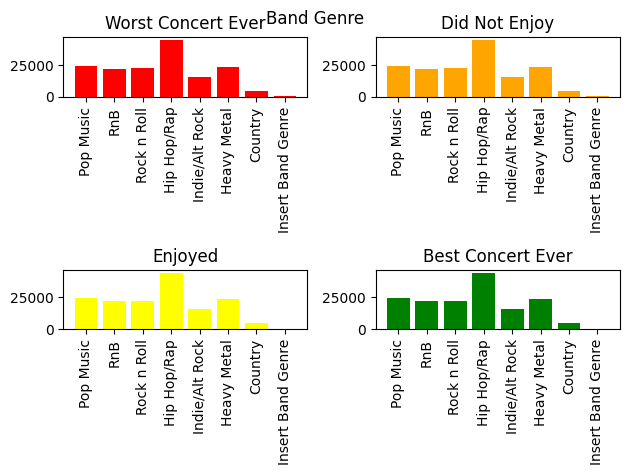

In [5]:
from collections import Counter

x_label="Concert Goer Age"
x_label="Band Genre"

x=train_data[x_label]
colors = ['red', 'orange', 'yellow', 'green']
# subplots 4 classes

for i in range(4):
    plt.subplot(2,2,i+1)
    
    #same x axis
    if x.dtype == 'float64':
        plt.hist(x.iloc[classes_idexes[i]], color=colors[i])
        plt.xlim([x.min(),x.max()])
    else:
        xx=Counter(x)
        df = pd.DataFrame.from_dict(xx, orient='index')
        plt.bar(df.index, df[0], color=colors[i])
        plt.xticks(rotation=90)
    plt.title(idx2class[i])

plt.tight_layout()
plt.suptitle(x_label)

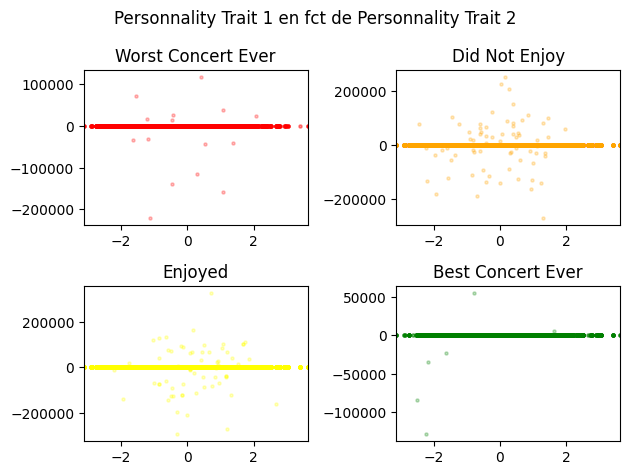

In [6]:
x_label='Personnality Trait 1'
y_label='Personnality Trait 2'
x=train_data[x_label]
y=train_data[y_label]
colors = ['red', 'orange', 'yellow', 'green']
# subplots 4 classes

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title(idx2class[i])
    # sort by occurence of each genre
    plt.scatter(x.iloc[classes_idexes[i]], y.iloc[classes_idexes[i]], color=colors[i], label=idx2class[i], alpha=0.25,s=5)
    #same x axis
    plt.xlim(min(x),max(x))
plt.suptitle(x_label+" en fct de "+y_label)
plt.tight_layout()

In [7]:
# import itertools
# from helper_func import viewEllipse

# labels=train_data.copy()
# labels.drop(['Id','Concert Enjoyment','Band Name','Concert ID','Seated','Rain','Inside Venue','Concert Goer ID','Band Country of Origin',"Concert Goer Country of Origin"], axis=1, inplace=True)
# labels=labels.columns.tolist()


# comb=list(itertools.combinations(labels,2))
# length_plot=int(np.ceil(np.sqrt(len(comb))))
# fig, axs = plt.subplots(length_plot,length_plot,figsize=(40,30))


# colors = ['red', 'orange', 'yellow', 'green']

# for j,(x_label,y_label) in enumerate(comb):
#     x=train_data[x_label]
#     y=train_data[y_label]
#     # subplots 4 classes
#     current_ax=axs[int(j/length_plot),j%length_plot]
#     current_ax.set(xlabel=x_label, ylabel=y_label)
#     for i in range(4):
#         xx=x.iloc[classes_idexes[i]]
#         yy=y.iloc[classes_idexes[i]]
#         current_ax.scatter(xx,yy , color=colors[i], label=idx2class[i], alpha=0.2,s=1, marker='.')
        
#         if xx.dtype == 'float64' and yy.dtype == 'float64':
#             viewEllipse(np.array([xx,yy]).T, current_ax, scale=1, facecolor=colors[i], edgecolor='black', alpha=0.25)
        
        
        
    
# plt.subplots_adjust()
# fig.tight_layout()
# fig.savefig('scatter.pdf')
# fig.savefig('allcomb.png',dpi=300)

In [8]:
train_data.columns.tolist()

['Id',
 'Band Name',
 'Band Genre',
 'Band Country of Origin',
 'Band Debut',
 'Concert ID',
 'Concert Attendance',
 'Inside Venue',
 'Rain',
 'Seated',
 'Personnality Trait 1',
 'Personnality Trait 2',
 'Personnality Trait 3',
 'Personnality Trait 4',
 'Concert Goer Age',
 'Concert Goer ID',
 'Height (cm)',
 'Concert Goer Country of Origin',
 'Concert Enjoyment']

In [9]:
train_data.nunique()

Id                                156023
Band Name                             54
Band Genre                             8
Band Country of Origin                 4
Band Debut                            34
Concert ID                          1000
Concert Attendance                    18
Inside Venue                           2
Rain                                   2
Seated                                 2
Personnality Trait 1                2000
Personnality Trait 2                2149
Personnality Trait 3                2191
Personnality Trait 4                2000
Concert Goer Age                      61
Concert Goer ID                     2000
Height (cm)                           51
Concert Goer Country of Origin       152
Concert Enjoyment                      4
dtype: int64

In [10]:
test_data.nunique()

Id                                27609
Band Name                            54
Band Genre                            8
Band Country of Origin                4
Band Debut                           34
Concert ID                         1000
Concert Attendance                   18
Inside Venue                          2
Rain                                  2
Seated                                2
Personnality Trait 1               2000
Personnality Trait 2               2034
Personnality Trait 3               2039
Personnality Trait 4               2000
Concert Goer Age                     61
Concert Goer ID                    2000
Height (cm)                          51
Concert Goer Country of Origin      152
dtype: int64

In [11]:
# remove nan value from dataframe
train_data = train_data.dropna()
test_data = test_data.dropna()

train_data = train_data[train_data['Band Genre'] != 'Insert Band Genre']
train_data = train_data[train_data['Band Country of Origin'] != 'Insert Band Country of Origin']
train_data = train_data[train_data['Band Name'] != 'Insert Band Name']

test_data = test_data[test_data['Band Genre'] != 'Insert Band Genre']
test_data = test_data[test_data['Band Country of Origin'] != 'Insert Band Country of Origin']
test_data = test_data[test_data['Band Name'] != 'Insert Band Name']

genre_dictionary = dict(zip(train_data['Band Genre'].unique(), range(len(train_data['Band Genre'].unique()))))
train_data = train_data.replace({'Band Genre':genre_dictionary})
test_data = test_data.replace({'Band Genre':genre_dictionary})

countries_dictionary = dict(zip(train_data['Band Country of Origin'].unique(), range(len(train_data['Band Country of Origin'].unique()))))
train_data = train_data.replace({'Band Country of Origin':countries_dictionary})
test_data = test_data.replace({'Band Country of Origin':countries_dictionary})

names_dictionary = dict(zip(train_data['Band Name'].unique(), range(len(train_data['Band Name'].unique()))))
train_data = train_data.replace({'Band Name':names_dictionary})
test_data = test_data.replace({'Band Name':names_dictionary})

concert_goer_country_dictionary = dict(zip(train_data['Concert Goer Country of Origin'].unique(), range(len(train_data['Concert Goer Country of Origin'].unique()))))
train_data = train_data.replace({'Concert Goer Country of Origin':concert_goer_country_dictionary})
test_data = test_data.replace({'Concert Goer Country of Origin':concert_goer_country_dictionary})

concert_goer_ID_dictionary = dict(zip(train_data['Concert Goer ID'].unique(), range(len(train_data['Concert Goer ID'].unique()))))
train_data = train_data.replace({'Concert Goer ID':concert_goer_ID_dictionary})
test_data = test_data.replace({'Concert Goer ID':concert_goer_ID_dictionary})

enjoyment_dictionary = dict(zip(train_data['Concert Enjoyment'].unique(), range(len(train_data['Concert Enjoyment'].unique()))))
train_data = train_data.replace({'Concert Enjoyment':enjoyment_dictionary})
test_data = test_data.replace({'Concert Enjoyment':enjoyment_dictionary})

# Remove "ConcertExperience" in Id column
train_data['Id'] = train_data['Id'].str.replace('ConcertExperience_', '')
test_data['Id'] = test_data['Id'].str.replace('ConcertExperience_', '')


In [12]:
train_data

,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin,Concert Enjoyment
1,146268,0,0,0,1968.0,731.0,54.0,True,False,True,-2.069449,0.017777,-1.910675,0.610265,43.0,0,158.0,0,0
3,140839,1,1,0,1992.0,704.0,8103.0,False,True,False,-0.858054,1.022827,-0.348389,-1.147251,17.0,1,150.0,1,1
4,19149,0,0,0,1968.0,95.0,54.0,False,False,False,-0.793029,-1.166528,-0.043766,0.969661,59.0,2,166.0,0,2
5,125567,2,0,1,1998.0,627.0,540000.0,False,False,True,0.091389,-0.691694,0.603638,0.500926,43.0,3,166.0,1,3
7,82419,3,2,0,1980.0,412.0,54.0,True,False,False,0.755175,1.753481,0.942377,-0.657241,67.0,4,171.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169995,14055,17,1,1,1985.0,70.0,162754.0,True,False,False,-0.095021,0.175175,0.914245,0.357359,50.0,545,180.0,4,2
169996,192792,17,1,1,1985.0,963.0,54.0,False,False,False,-0.733719,-0.285776,-0.323312,0.641180,71.0,1817,143.0,15,1
169997,152942,15,5,1,2005.0,764.0,54.0,False,False,False,0.744969,-0.965547,1.020598,1.027389,27.0,141,176.0,1,2
169998,138957,16,3,0,1995.0,694.0,22026.0,False,True,True,0.821976,0.351411,0.175762,1.455654,39.0,646,176.0,1,2


In [13]:
test_data

,Id,Band Name,Band Genre,Band Country of Origin,Band Debut,Concert ID,Concert Attendance,Inside Venue,Rain,Seated,Personnality Trait 1,Personnality Trait 2,Personnality Trait 3,Personnality Trait 4,Concert Goer Age,Concert Goer ID,Height (cm),Concert Goer Country of Origin
0,70055,7,2,0,1980.0,350.0,2980.0,True,False,True,1.065107,0.057660,0.249639,-0.933976,74.0,1527,165.0,4
1,34799,20,3,0,2014.0,173.0,8103.0,True,True,False,-0.886947,0.801365,0.525624,0.176655,29.0,619,151.0,74
2,100410,33,2,1,2010.0,502.0,2980.0,True,True,False,0.744700,-0.797531,-0.034166,-0.226052,27.0,1935,146.0,1
4,127249,1,1,0,1992.0,636.0,2980.0,False,False,False,1.407366,-0.084155,-0.673233,1.733714,21.0,1458,177.0,62
5,158156,36,0,0,1995.0,790.0,1096.0,False,True,True,-0.040457,-1.064881,-0.750242,-0.758297,61.0,1197,165.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,82288,18,3,0,1979.0,411.0,2980.0,True,False,False,-0.421714,-1.549670,-0.351770,0.132489,42.0,1380,178.0,4
29996,27139,6,3,0,1978.0,135.0,8103.0,True,False,False,0.615087,-0.047092,0.339228,0.820159,37.0,1351,186.0,1
29997,197434,36,0,0,1995.0,987.0,8103.0,False,False,True,-1.396551,-0.508627,-1.692584,1.640931,45.0,1766,158.0,148
29998,166029,42,1,0,1968.0,830.0,8103.0,False,True,False,0.168073,-0.785460,0.898273,1.608389,36.0,335,170.0,0


In [14]:
train_data_np = train_data.to_numpy(dtype = np.float64)
test_data_np = test_data.to_numpy(dtype = np.float64)

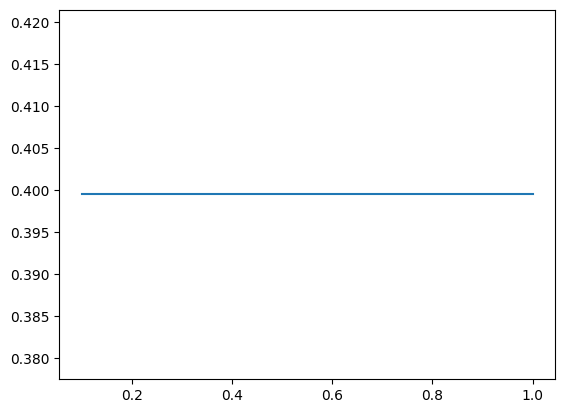

In [15]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

C_values = [0.1, 0.3, 0.5, 0.8, 1.0]
L = []

for c in C_values:
    clf = LogisticRegression(C = c)
    clf.fit(train_data_np[:,:-1],train_data_np[:,-1])
    model_prediction = clf.predict(train_data_np[:,:-1])
    L.append(f1_score(train_data_np[:,-1], model_prediction, average = 'micro'))

plt.plot(C_values, L)
plt.show()


In [16]:
print(max(L))

0.3994846188943083


In [17]:
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [18]:
from sklearn.model_selection import train_test_split

# train model using "Concert Enjoyment" column as output
X = train_data_np[:,:-1]
# output is "Concert Enjoyment" column
y = train_data_np[:,-1]

In [19]:
val_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=val_size, random_state=seed)

In [20]:
all_f1_scores = {"Logistic Regression":0, "Random Forest":0, "Decision Tree":0, "KNN":0, "Naive Bayes":0, "Bagging":0, "Neural Network":0, "AdaBoost":0, "Gradient Boosting":0, "Extra Trees":0}

C:\Users\shahr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shahr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

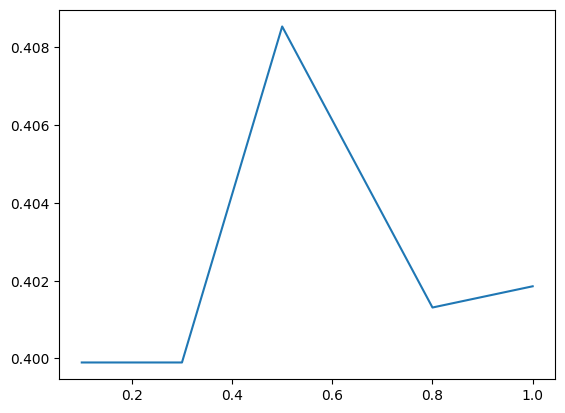

Logistic Regression:  0.4085403078109437  with C =  0.5


In [21]:
# logistic regression

f1_scores = []
for C in [0.1, 0.3, 0.5, 0.8, 1.0]:
    model = LogisticRegression(C = C)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred, average = 'micro'))
    
all_f1_scores["Logistic Regression"] = max(f1_scores)
    
plt.plot([0.1, 0.3, 0.5, 0.8, 1.0], f1_scores)
plt.show()

print("Logistic Regression: ", max(f1_scores), " with C = ", [0.1, 0.3, 0.5, 0.8, 1.0][f1_scores.index(max(f1_scores))])

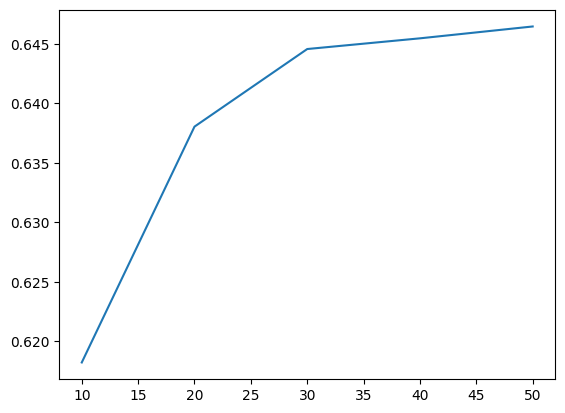

Random Forest:  0.6464672428750442  with n_estimators =  50


In [22]:
# random forest

f1_scores = []
for n_estimators in [10, 20, 30, 40, 50]:
    model = RandomForestClassifier(n_estimators = n_estimators)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred, average = 'micro'))
    
all_f1_scores["Random Forest"] = max(f1_scores)
    
plt.plot([10, 20, 30, 40, 50], f1_scores)
plt.show()

print("Random Forest: ", max(f1_scores), " with n_estimators = ", [10, 20, 30, 40, 50][f1_scores.index(max(f1_scores))])

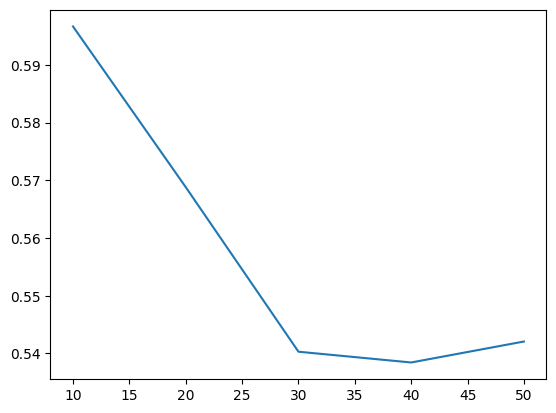

Decision Tree:  0.5966327153552036  with max_depth =  10


In [23]:
# decision tree

f1_scores = []

for max_depth in [10, 20, 30, 40, 50]:
    model = DecisionTreeClassifier(max_depth = max_depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred, average = 'micro'))
    
all_f1_scores["Decision Tree"] = max(f1_scores)
    
plt.plot([10, 20, 30, 40, 50], f1_scores)
plt.show()
    
print("Decision Tree: ", max(f1_scores), " with max_depth = ", [10, 20, 30, 40, 50][f1_scores.index(max(f1_scores))])

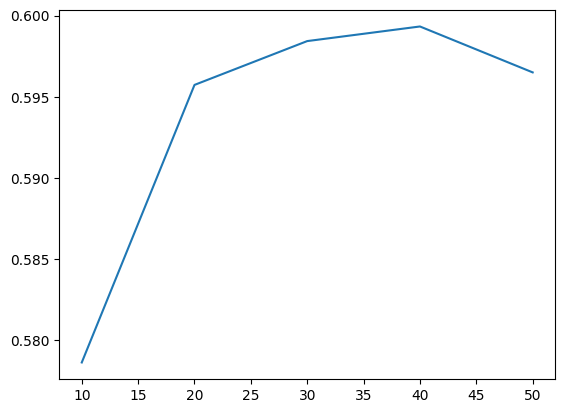

KNN:  0.5993316839636282  with n_neighbors =  40


In [24]:
# KNN

f1_scores = []

for n_neighbors in [10, 20, 30, 40, 50]:
    model = KNeighborsClassifier(n_neighbors = n_neighbors)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred, average = 'micro'))
    
all_f1_scores["KNN"] = max(f1_scores)
    
plt.plot([10, 20, 30, 40, 50], f1_scores)
plt.show()
    
print("KNN: ", max(f1_scores), " with n_neighbors = ", [10, 20, 30, 40, 50][f1_scores.index(max(f1_scores))])

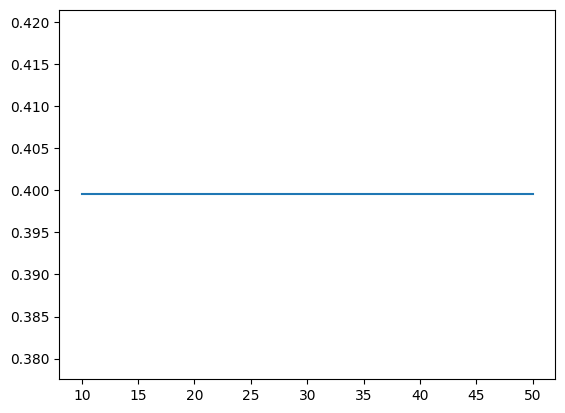

Naive Bayes:  0.3995116152041898  with var_smoothing =  10


In [25]:
# Naive Bayes

f1_scores = []

for var_smoothing in [10, 20, 30, 40, 50]:
    model = GaussianNB(var_smoothing = var_smoothing)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred, average = 'micro'))
    
all_f1_scores["Naive Bayes"] = max(f1_scores)
    
plt.plot([10, 20, 30, 40, 50], f1_scores)
plt.show()
    
print("Naive Bayes: ", max(f1_scores), " with var_smoothing = ", [10, 20, 30, 40, 50][f1_scores.index(max(f1_scores))])

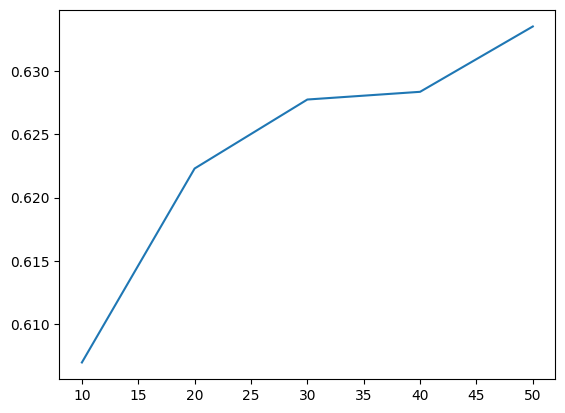

Bagging:  0.633550750249012  with n_estimators =  50


In [26]:
# Bagging

f1_scores = []

for n_estimators in [10, 20, 30, 40, 50]:
    model = BaggingClassifier(n_estimators = n_estimators)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred, average = 'micro'))
    
all_f1_scores["Bagging"] = max(f1_scores)
    
plt.plot([10, 20, 30, 40, 50], f1_scores)
plt.show()
    
print("Bagging: ", max(f1_scores), " with n_estimators = ", [10, 20, 30, 40, 50][f1_scores.index(max(f1_scores))])

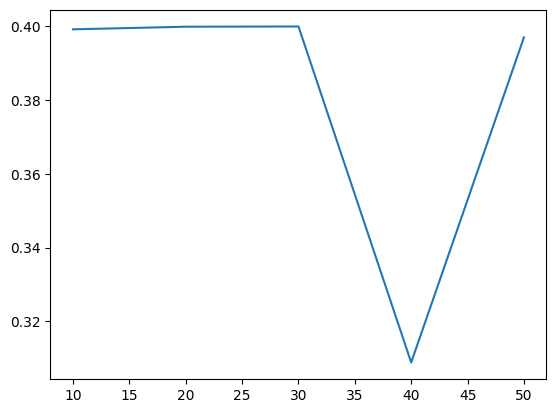

Neural Network:  0.3999614433055939  with alpha =  30


In [27]:
# Neural Network

f1_scores = []

for alpha in [10, 20, 30, 40, 50]:
    model = MLPClassifier(alpha = alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred, average = 'micro'))
    
all_f1_scores["Neural Network"] = max(f1_scores)
    
plt.plot([10, 20, 30, 40, 50], f1_scores)
plt.show()
    
print("Neural Network: ", max(f1_scores), " with alpha = ", [10, 20, 30, 40, 50][f1_scores.index(max(f1_scores))])

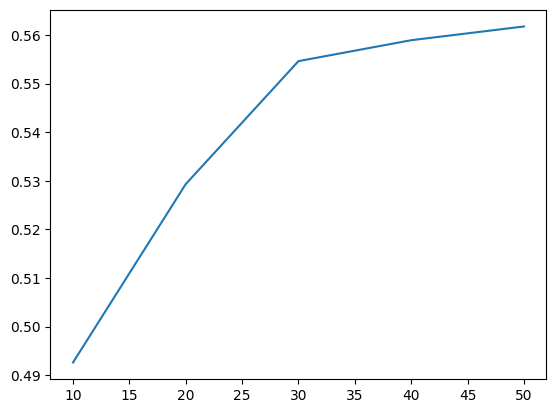

AdaBoost:  0.5617710374963854  with n_estimators =  50


In [28]:
# AdaBoost

f1_scores = []

for n_estimators in [10, 20, 30, 40, 50]:
    model = AdaBoostClassifier(n_estimators = n_estimators)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred, average = 'micro'))
    
all_f1_scores["AdaBoost"] = max(f1_scores)
    
plt.plot([10, 20, 30, 40, 50], f1_scores)
plt.show()
    
print("AdaBoost: ", max(f1_scores), " with n_estimators = ", [10, 20, 30, 40, 50][f1_scores.index(max(f1_scores))])

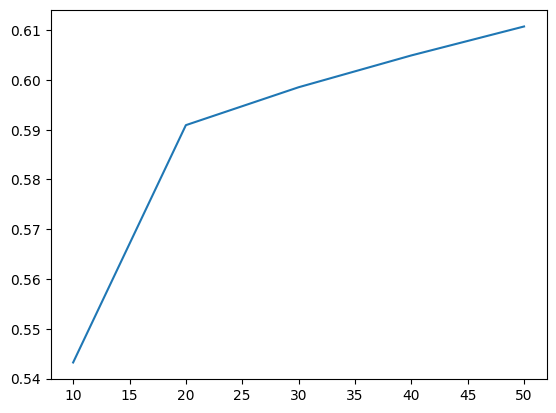

Gradient Boosting:  0.6107380393920895  with n_estimators =  50


In [29]:
# Gradient Boosting

f1_scores = []

for n_estimators in [10, 20, 30, 40, 50]:
    model = GradientBoostingClassifier(n_estimators = n_estimators)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred, average = 'micro'))
    
all_f1_scores["Gradient Boosting"] = max(f1_scores)
    
plt.plot([10, 20, 30, 40, 50], f1_scores)
plt.show()
    
print("Gradient Boosting: ", max(f1_scores), " with n_estimators = ", [10, 20, 30, 40, 50][f1_scores.index(max(f1_scores))])

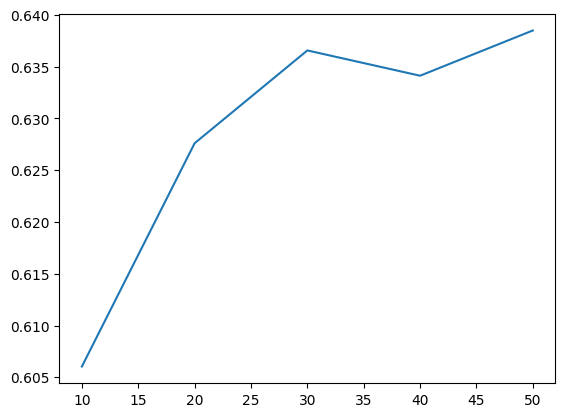

Extra Trees:  0.6384988593644572  with n_estimators =  50


In [30]:
# Extra Trees

f1_scores = []

for n_estimators in [10, 20, 30, 40, 50]:
    model = ExtraTreesClassifier(n_estimators = n_estimators)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred, average = 'micro'))
    
all_f1_scores["Extra Trees"] = max(f1_scores)
    
plt.plot([10, 20, 30, 40, 50], f1_scores)
plt.show()
    
print("Extra Trees: ", max(f1_scores), " with n_estimators = ", [10, 20, 30, 40, 50][f1_scores.index(max(f1_scores))])